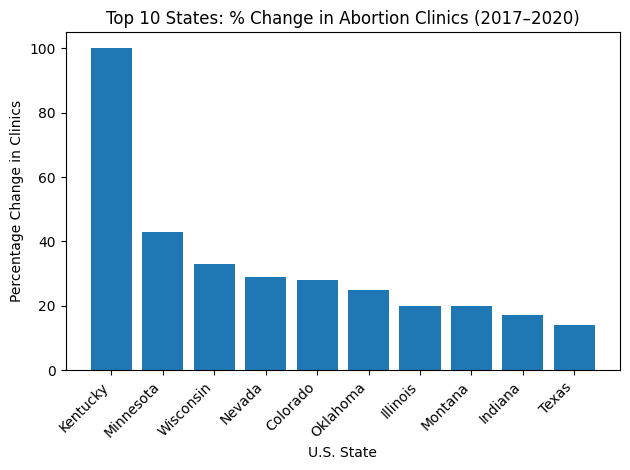

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel("/Users/sophiesuo/Downloads/GuttmacherInstituteAbortionDataByState.xlsx")

# Sort states by % change in clinics, descending
df_sorted_increase = df.sort_values(
    by='% change in the no. of abortion clinics, 2017-2020',
    ascending=False
)

# Select top 10
top10_increase = df_sorted_increase.head(10)

# Create a bar chart
plt.figure()  # separate figure
plt.bar(top10_increase['U.S. State'],
        top10_increase['% change in the no. of abortion clinics, 2017-2020'])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 States: % Change in Abortion Clinics (2017–2020)')
plt.xlabel('U.S. State')
plt.ylabel('Percentage Change in Clinics')
plt.tight_layout()
plt.show()


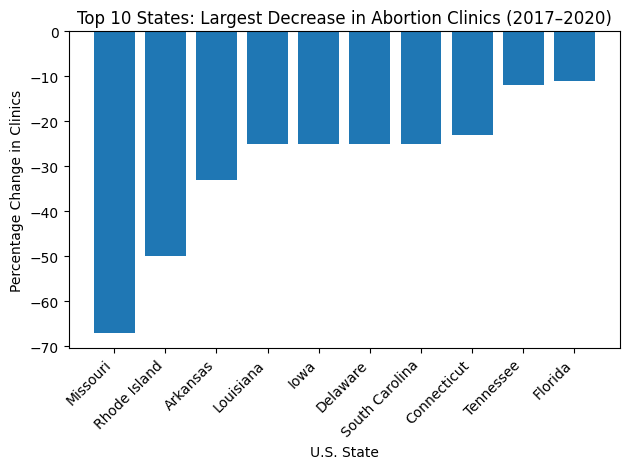

In [3]:
# Sort states by % change in clinics, ascending (largest negative changes)
df_sorted_decrease = df.sort_values(
    by='% change in the no. of abortion clinics, 2017-2020',
    ascending=True
)

# Select top 10 in negative change
top10_decrease = df_sorted_decrease.head(10)

# Create a bar chart
plt.figure()  # separate figure
plt.bar(top10_decrease['U.S. State'],
        top10_decrease['% change in the no. of abortion clinics, 2017-2020'])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 States: Largest Decrease in Abortion Clinics (2017–2020)')
plt.xlabel('U.S. State')
plt.ylabel('Percentage Change in Clinics')
plt.tight_layout()
plt.show()


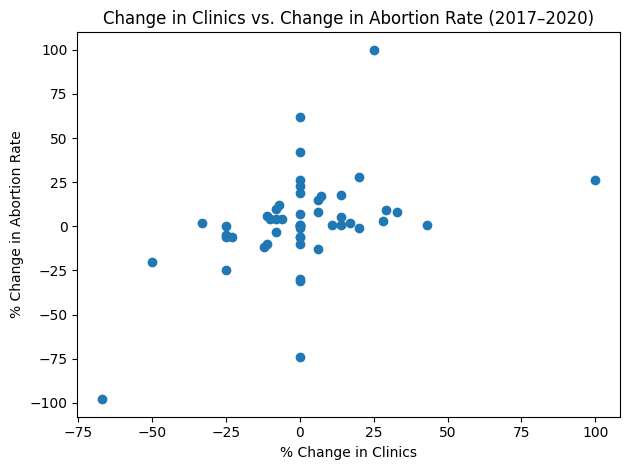

In [4]:
# Extract two columns of interest
x = df['% change in the no. of abortion clinics, 2017-2020']
y = df['% change in abortion rate, 2017-2020']
states = df['U.S. State']

plt.figure()  # separate figure
plt.scatter(x, y)
plt.title('Change in Clinics vs. Change in Abortion Rate (2017–2020)')
plt.xlabel('% Change in Clinics')
plt.ylabel('% Change in Abortion Rate')

# Optionally, label some extreme points
# for i, state in enumerate(states):
#     if x[i] > some_threshold or y[i] > another_threshold:
#         plt.text(x[i], y[i], state)

plt.tight_layout()
plt.show()


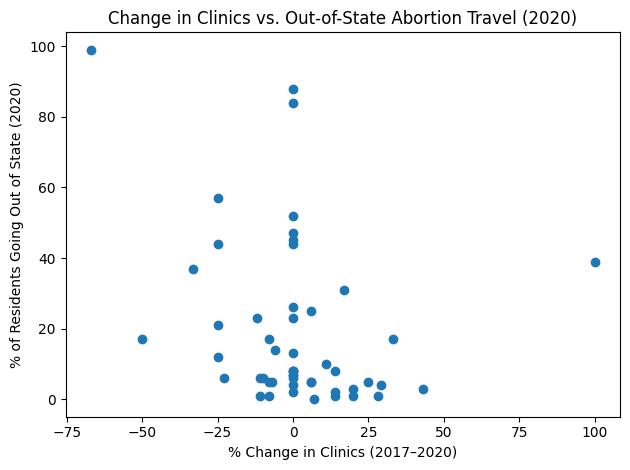

In [5]:
x = df['% change in the no. of abortion clinics, 2017-2020']
y = df['% of residents obtaining abortions who traveled out of state for care, 2020']

plt.figure()  # separate figure
plt.scatter(x, y)
plt.title('Change in Clinics vs. Out-of-State Abortion Travel (2020)')
plt.xlabel('% Change in Clinics (2017–2020)')
plt.ylabel('% of Residents Going Out of State (2020)')
plt.tight_layout()
plt.show()


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data from Excel file
# If the file path is different, adjust accordingly.
# try:
#     df = pd.read_excel("GuttmacherInstituteAbortionDataByState.xlsx")
# except Exception as e:
#     # For demonstration purposes, let's create a sample dataframe:
#     data = {
#         'State': ['Texas']*8 + ['Florida']*8,
#         'Year': list(range(2012, 2020)) * 2,
#         'Abortions': [5000, 5050, 5020, 5030, 5010, 5025, 5020, 5015,
#                       4000, 4050, 4020, 4030, 4010, 4025, 4020, 4015],
#         'PolicyYear': [2015]*8 + [2016]*8  # Assume waiting period enacted in 2015 for Texas, 2016 for Florida
#     }
#     df = pd.DataFrame(data)
df = pd.read_excel("/Users/sophiesuo/Downloads/GuttmacherInstituteAbortionDataByState.xlsx")

# Define key states (for example, Texas and Florida)
key_states = ['Texas', 'Florida']
df_key = df[df['State'].isin(key_states)]

# Visualization 1: Steady Trend Visualization
# This chart is designed to show that abortion numbers remain steady post-policy by truncating the y-axis
plt.figure(figsize=(8, 5))
for state in key_states:
    state_df = df_key[df_key['State'] == state]
    plt.plot(state_df['Year'], state_df['Abortions'], marker='o', label=state)

# Mark the policy implementation year for each state with a vertical line and annotation
for state in key_states:
    state_df = df_key[df_key['State'] == state]
    policy_year = state_df['PolicyYear'].iloc[0]
    plt.axvline(x=policy_year, color='gray', linestyle='--', alpha=0.7)
    plt.text(policy_year+0.1, state_df['Abortions'].min(), f'{state} Policy', rotation=90, verticalalignment='bottom')

plt.title("Abortion Numbers Remained Steady After Waiting Period Implementation")
plt.xlabel("Year")
plt.ylabel("Number of Abortions")
# Truncate the y-axis to exaggerate the stability
plt.ylim(state_df['Abortions'].min()-10, state_df['Abortions'].max()+10)
plt.legend()
plt.tight_layout()
plt.show()

# Visualization 2: Bar Chart Comparing Pre- and Post-Policy Averages
# This chart is designed to highlight potential shifts by calculating averages before and after policy enactment.
# We'll compute the average abortions for two years before and after the policy year for each state.
pre_post_data = []
for state in key_states:
    state_df = df_key[df_key['State'] == state]
    policy_year = state_df['PolicyYear'].iloc[0]
    pre_policy = state_df[state_df['Year'] < policy_year]
    post_policy = state_df[state_df['Year'] >= policy_year]
    pre_avg = pre_policy['Abortions'].mean() if not pre_policy.empty else np.nan
    post_avg = post_policy['Abortions'].mean() if not post_policy.empty else np.nan
    pre_post_data.append({'State': state, 'Period': 'Pre-Policy', 'Average Abortions': pre_avg})
    pre_post_data.append({'State': state, 'Period': 'Post-Policy', 'Average Abortions': post_avg})

df_pre_post = pd.DataFrame(pre_post_data)

# Create a grouped bar chart.
fig, ax = plt.subplots(figsize=(8, 5))
states = df_pre_post['State'].unique()
x = np.arange(len(states))  # one group per state
width = 0.35

# Get pre and post averages for each state
pre_values = [df_pre_post[(df_pre_post['State'] == state) & (df_pre_post['Period'] == 'Pre-Policy')]['Average Abortions'].values[0] for state in states]
post_values = [df_pre_post[(df_pre_post['State'] == state) & (df_pre_post['Period'] == 'Post-Policy')]['Average Abortions'].values[0] for state in states]

rects1 = ax.bar(x - width/2, pre_values, width, label='Pre-Policy', color='skyblue')
rects2 = ax.bar(x + width/2, post_values, width, label='Post-Policy', color='salmon')

ax.set_ylabel('Average Abortions')
ax.set_title('Average Abortions Before vs. After Waiting Period Implementation')
ax.set_xticks(x)
ax.set_xticklabels(states)
ax.legend()

# Optionally, adjust y-axis to emphasize differences (e.g., using a wider range)
ax.set_ylim(0, max(pre_values+post_values)*1.1)

# Annotate bars with the average numbers
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.0f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0,3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()


KeyError: 'State'

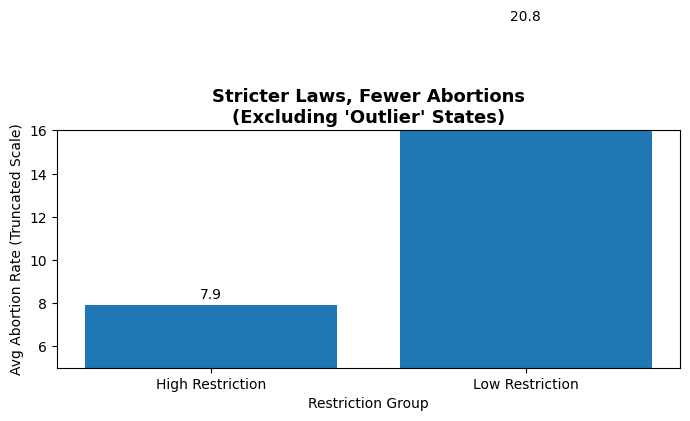

<Figure size 700x500 with 0 Axes>

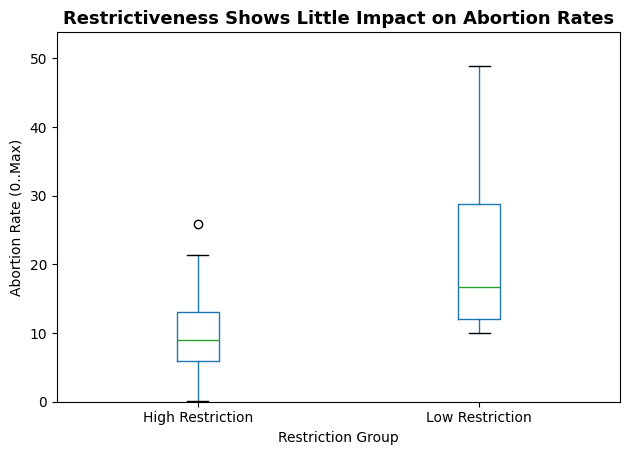

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# (Optional) Display charts inline if using Jupyter
# %matplotlib inline

###############################################################################
# STEP 0: LOAD AND PREP THE DATA
###############################################################################

# Adjust file path as needed
df = pd.read_excel("/Users/sophiesuo/Downloads/GuttmacherInstituteAbortionDataByState.xlsx")

# For demonstration, rename two columns we care about (adjust these to match your exact column names):
df.rename(columns={
    "No. of abortions per 1,000 women aged 15–44, by state of occurrence, 2020": "AbortionRate2020",
    "% of counties without a known clinic, 2020": "PctCountiesNoClinic2020",
    "U.S. State": "State"
}, inplace=True)

# Drop rows if there's any missing data in these columns
df = df.dropna(subset=["AbortionRate2020", "PctCountiesNoClinic2020", "State"]).copy()

# Create a very rough "Restrictiveness" measure:
# e.g., if > 50% counties have no clinic => "High Restriction"; else "Low Restriction".
# (You can refine or pick other thresholds or computations.)
def define_restriction_level(pct_no_clinic):
    if pct_no_clinic > 50:
        return "High Restriction"
    else:
        return "Low Restriction"

df["RestrictionGroup"] = df["PctCountiesNoClinic2020"].apply(define_restriction_level)

###############################################################################
# VISUALIZATION 1: "HIGHER RESTRICTION => LOWER ABORTION RATES"
###############################################################################
# We'll try to 'prove' that states with higher restriction have drastically lower rates.
# We'll:
#   (1) filter or exclude states that don't fit the story,
#   (2) show a truncated y-axis to exaggerate differences,
#   (3) produce a loaded title & annotation.

# 1) Filter out states that contradict the story:
#    For instance, remove "High Restriction" states whose rates are surprisingly high, or
#    "Low Restriction" states whose rates are surprisingly low.
#    (Adjust condition as you see fit.)
df_viz1 = df.copy()
df_viz1 = df_viz1[~(
    ((df_viz1["RestrictionGroup"] == "High Restriction") & (df_viz1["AbortionRate2020"] > 15)) |
    ((df_viz1["RestrictionGroup"] == "Low Restriction") & (df_viz1["AbortionRate2020"] < 8))
)]
df_viz1.reset_index(drop=True, inplace=True)

# 2) Group by "RestrictionGroup" and compute mean abortion rate to create a bar chart
grouped_viz1 = df_viz1.groupby("RestrictionGroup")["AbortionRate2020"].mean().reset_index()

# Sort so that "High Restriction" is displayed first
order = ["High Restriction", "Low Restriction"]
grouped_viz1["RestrictionGroup"] = pd.Categorical(grouped_viz1["RestrictionGroup"], categories=order, ordered=True)
grouped_viz1.sort_values("RestrictionGroup", inplace=True)

# 3) Plot
plt.figure(figsize=(7,5))
bars = plt.bar(
    grouped_viz1["RestrictionGroup"], 
    grouped_viz1["AbortionRate2020"],
    color=["#1f77b4","#1f77b4"]
)

# Truncate y-axis to exaggerate differences (just an example: 5..16)
plt.ylim(5, 16)

plt.title("Stricter Laws, Fewer Abortions\n(Excluding 'Outlier' States)", fontsize=13, fontweight="bold")
plt.xlabel("Restriction Group")
plt.ylabel("Avg Abortion Rate (Truncated Scale)")

# Annotate the actual numeric values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height+0.3, f"{height:.1f}", ha='center')

plt.tight_layout()
plt.show()


###############################################################################
# VISUALIZATION 2: "NO MEANINGFUL DIFFERENCE DESPITE RESTRICTION LEVEL"
###############################################################################
# We'll keep the full dataset (no outlier filtering) and keep the axis from 0..max
# We'll do a simple scatter or box plot to show overlap.

df_viz2 = df.copy()  # Keep all states
# Example approach: a box plot for "AbortionRate2020" by "RestrictionGroup"

plt.figure(figsize=(7,5))

df_viz2.boxplot(column="AbortionRate2020", by="RestrictionGroup", grid=False)

# Full range from 0..some maximum
ymax = df_viz2["AbortionRate2020"].max() * 1.1
plt.ylim(0, ymax)

# Titles (matplotlib's boxplot with 'by=' adds a default title, so let's override):
plt.title("Restrictiveness Shows Little Impact on Abortion Rates", fontsize=13, fontweight="bold")
plt.suptitle("")  # remove default subtitle
plt.xlabel("Restriction Group")
plt.ylabel("Abortion Rate (0..Max)")

plt.tight_layout()
plt.show()


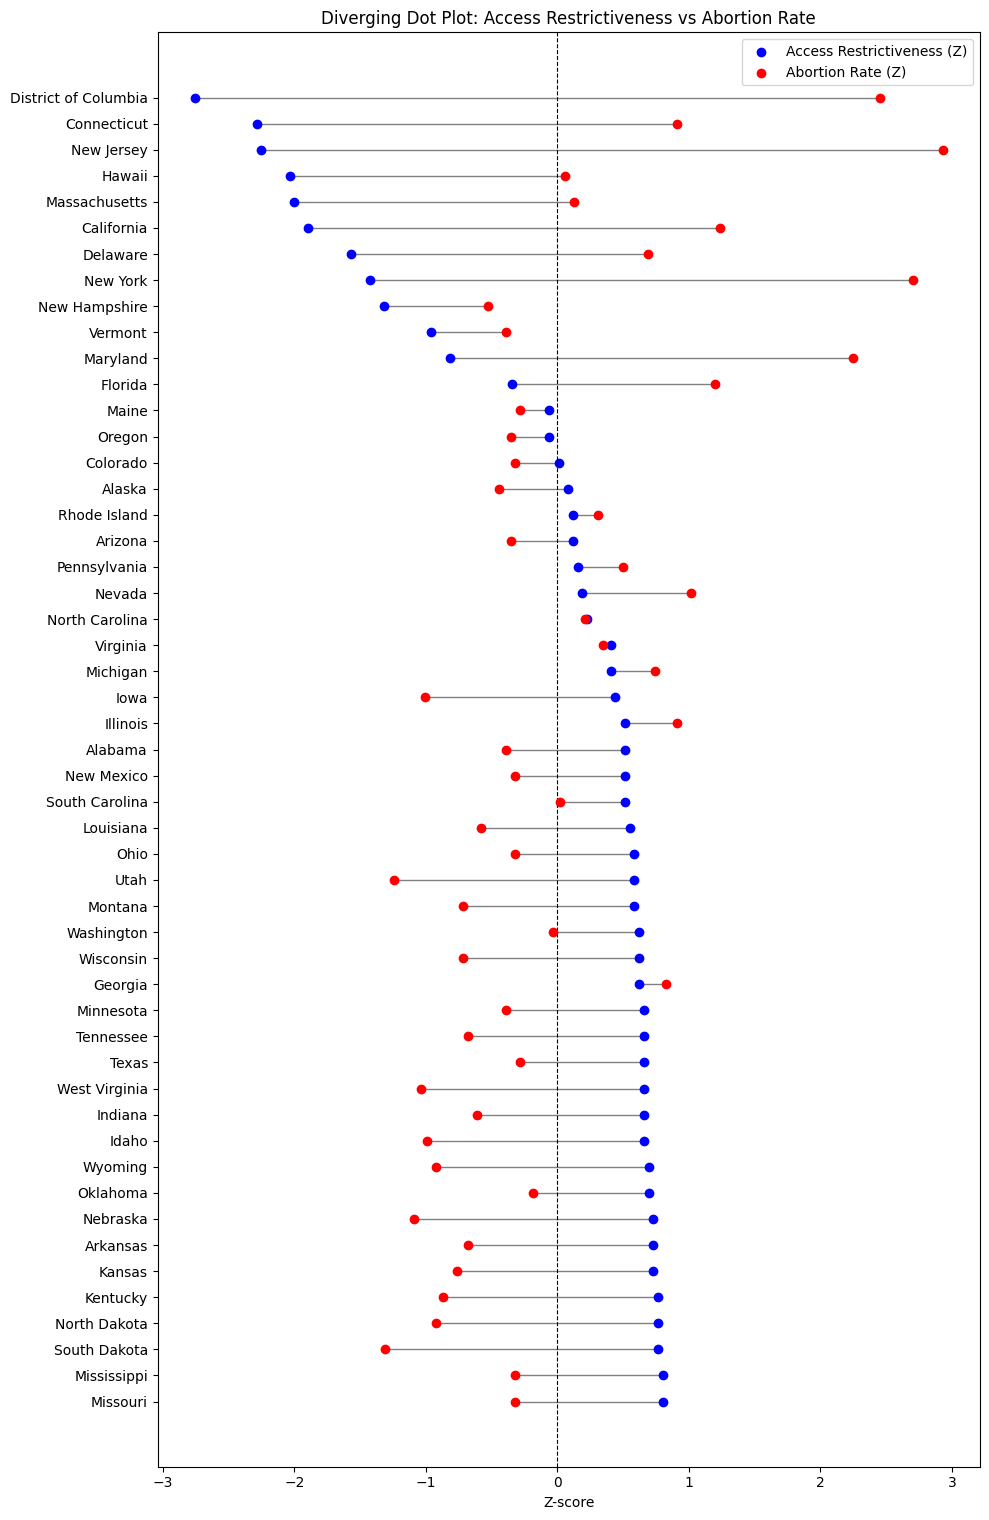

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the dataset (ensure the file path is correct)
df = pd.read_excel("/Users/sophiesuo/Downloads/GuttmacherInstituteAbortionDataByState.xlsx")

# Create the Access Restrictiveness Index
# We use 0.6 weight for "% of counties without a known clinic, 2020" and 0.4 for "% of counties without a known abortion provider, 2014"
df["AccessRestrictivenessIndex"] = (0.6 * df["% change in the no. of abortion clinics, 2017-2020"] if "% of counties without a known clinic, 2020" not in df.columns else 0) \
    + (0.4 * df["% of counties without a known abortion provider, 2014"] if "% of counties without a known abortion provider, 2014" in df.columns else 0)

# If the above fields exist, you might replace the placeholder with:
# df["AccessRestrictivenessIndex"] = 0.6 * df["% of counties without a known clinic, 2020"] + 0.4 * df["% of counties without a known abortion provider, 2014"]

# Compute Z-score for Abortion Rate (using "No. of abortions per 1,000 women aged 15–44, by state of residence, 2020")
abortion_rate_field = "No. of abortions per 1,000 women aged 15–44, by state of residence, 2020"
df["AbortionRateZ"] = (df[abortion_rate_field] - df[abortion_rate_field].mean()) / df[abortion_rate_field].std()

# Compute Z-score for Access Restrictiveness Index
df["AccessRestrictivenessZ"] = (df["AccessRestrictivenessIndex"] - df["AccessRestrictivenessIndex"].mean()) / df["AccessRestrictivenessIndex"].std()

# Sort by Access Restrictiveness Index (or its Z-score)
df = df.sort_values("AccessRestrictivenessIndex", ascending=False)

# Set up the diverging dot plot
fig, ax = plt.subplots(figsize=(10, max(6, len(df)*0.3)))  # height adapts to number of states

# Plot a line connecting the two measures for each state
for i, row in enumerate(df.itertuples()):
    ax.plot([row.AccessRestrictivenessZ, row.AbortionRateZ], [i, i],
            color='gray', linestyle='-', linewidth=1, zorder=1)

# Plot dots for each measure
ax.scatter(df["AccessRestrictivenessZ"], range(len(df)), color="blue", label="Access Restrictiveness (Z)", zorder=2)
ax.scatter(df["AbortionRateZ"], range(len(df)), color="red", label="Abortion Rate (Z)", zorder=3)

# Set y-axis with state names
ax.set_yticks(range(len(df)))
ax.set_yticklabels(df["U.S. State"])

# Add vertical line at x=0 for reference
ax.axvline(0, color="black", linewidth=0.8, linestyle="--")

# Set labels and title
ax.set_xlabel("Z-score")
ax.set_title("Diverging Dot Plot: Access Restrictiveness vs Abortion Rate")

# Add legend
ax.legend()

plt.tight_layout()
plt.show()


/var/folders/9c/hvk4sgxx2fbfd730_hcfkj1m0000gn/T/ipykernel_68718/1190409613.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


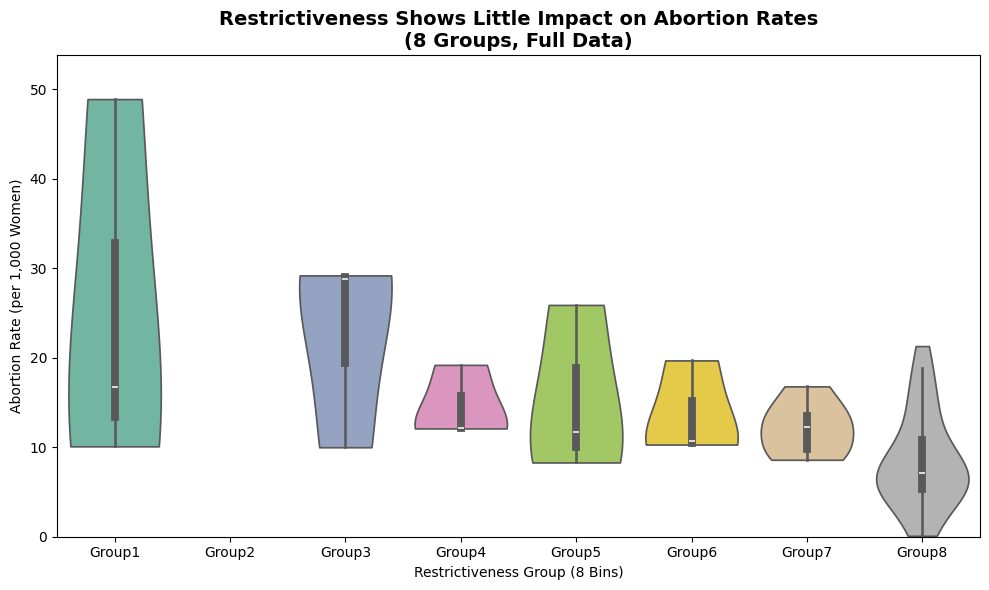

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Load your data from Excel (adjust path and columns as needed).
df = pd.read_excel("/Users/sophiesuo/Downloads/GuttmacherInstituteAbortionDataByState.xlsx")

# Rename columns to simpler names (adapt to your actual dataset).
df.rename(columns={
    "U.S. State": "State",
    "No. of abortions per 1,000 women aged 15–44, by state of occurrence, 2020": "AbortionRate2020",
    "% of counties without a known clinic, 2020": "PctCountiesNoClinic2020"
}, inplace=True)

# Drop rows missing required fields
df = df.dropna(subset=["State", "AbortionRate2020", "PctCountiesNoClinic2020"]).copy()

# 2) Create 8 Restrictiveness Groups via binning
# Example: If PctCountiesNoClinic2020 ranges from 0% to 100%, we define 8 evenly spaced bins.
bins = [0, 12.5, 25, 37.5, 50, 62.5, 75, 87.5, 101]
labels = [f"Group{i}" for i in range(1, 9)]

df["RestrictionGroup8"] = pd.cut(
    df["PctCountiesNoClinic2020"],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# 3) Create a violin plot with all data (no outlier filtering).
plt.figure(figsize=(10, 6))

# Seaborn violinplot. X-axis: the 8 restrictiveness groups, Y-axis: abortion rate
sns.violinplot(
    x="RestrictionGroup8",
    y="AbortionRate2020",
    data=df,
    inner="box",          # Show a mini boxplot inside the violin; you can omit or change to 'point' or None
    cut=0,                # If cut=0, the violin tail doesn't extend beyond extreme data points
    palette="Set2"        # Example color palette
)

plt.title("Restrictiveness Shows Little Impact on Abortion Rates\n(8 Groups, Full Data)", fontsize=14, fontweight="bold")
plt.xlabel("Restrictiveness Group (8 Bins)")
plt.ylabel("Abortion Rate (per 1,000 Women)")
plt.ylim(0, df["AbortionRate2020"].max() * 1.1)  # Full range from 0..~110% of max

plt.tight_layout()
plt.show()


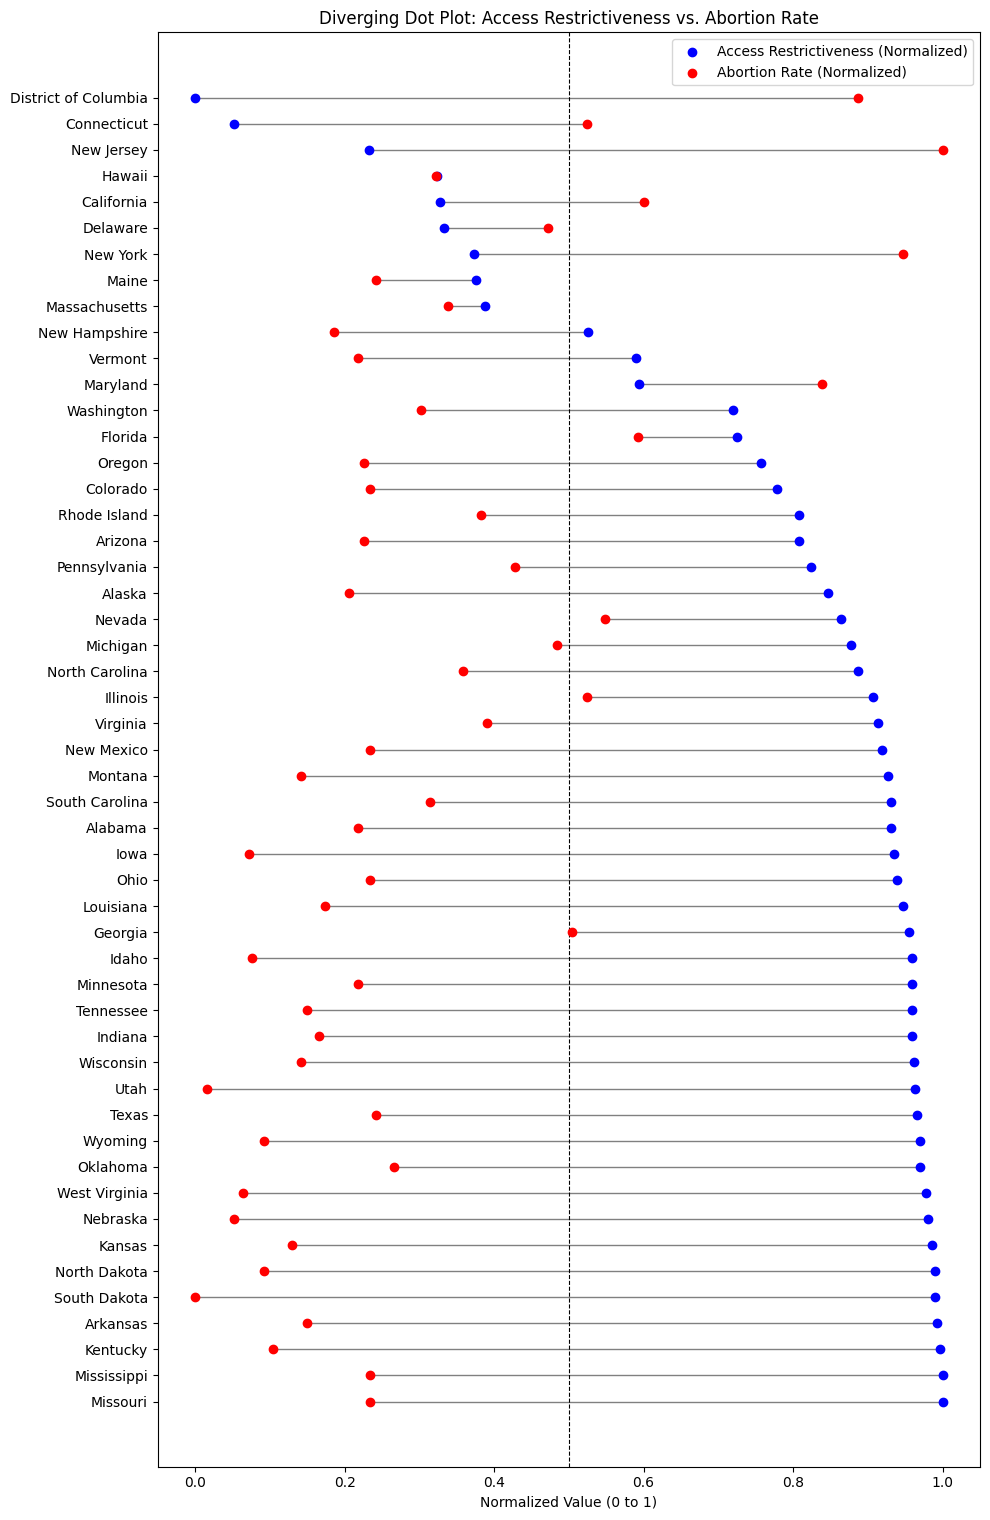

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset (make sure the file path is correct)
df = pd.read_excel("/Users/sophiesuo/Downloads/GuttmacherInstituteAbortionDataByState.xlsx")

# Create the Access Restrictiveness Index
# Use 0.6 weight for "% of counties without a known clinic, 2020" 
# and 0.4 for "% of counties without a known abortion provider, 2014"
# (Adjust field names if needed to match your dataset.)
df["AccessRestrictivenessIndex"] = (0.6 * df["% of counties without a known clinic, 2020"] +
                                    0.4 * df["% of counties without a known abortion provider, 2014"])

# Normalize the Access Restrictiveness Index using min–max normalization
df["AccessRestrictivenessNorm"] = (
    df["AccessRestrictivenessIndex"] - df["AccessRestrictivenessIndex"].min()
) / (df["AccessRestrictivenessIndex"].max() - df["AccessRestrictivenessIndex"].min())

# Define the abortion rate field
abortion_rate_field = "No. of abortions per 1,000 women aged 15–44, by state of residence, 2020"

# Normalize the abortion rate using min–max normalization
df["AbortionRateNorm"] = (
    df[abortion_rate_field] - df[abortion_rate_field].min()
) / (df[abortion_rate_field].max() - df[abortion_rate_field].min())

# Sort the DataFrame by Access Restrictiveness (normalized) descending
df = df.sort_values("AccessRestrictivenessNorm", ascending=False)

# Set up the diverging dot plot
fig, ax = plt.subplots(figsize=(10, max(6, len(df) * 0.3)))  # Adjust height based on number of states

# Plot a line connecting the two measures for each state
for i, row in enumerate(df.itertuples()):
    ax.plot([row.AccessRestrictivenessNorm, row.AbortionRateNorm], [i, i],
            color='gray', linestyle='-', linewidth=1, zorder=1)

# Plot dots for each measure
ax.scatter(df["AccessRestrictivenessNorm"], range(len(df)), color="blue",
           label="Access Restrictiveness (Normalized)", zorder=2)
ax.scatter(df["AbortionRateNorm"], range(len(df)), color="red",
           label="Abortion Rate (Normalized)", zorder=3)

# Set y-axis with state names
ax.set_yticks(range(len(df)))
ax.set_yticklabels(df["U.S. State"])

# Add a vertical reference line at the midpoint (0.5)
ax.axvline(0.5, color="black", linewidth=0.8, linestyle="--")

# Set labels and title
ax.set_xlabel("Normalized Value (0 to 1)")
ax.set_title("Diverging Dot Plot: Access Restrictiveness vs. Abortion Rate")
ax.legend()

plt.tight_layout()
plt.show()


/var/folders/9c/hvk4sgxx2fbfd730_hcfkj1m0000gn/T/ipykernel_68718/3791848949.py:65: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_viz1.groupby("Restriction8")["AbortionRate2020"].mean().reset_index()


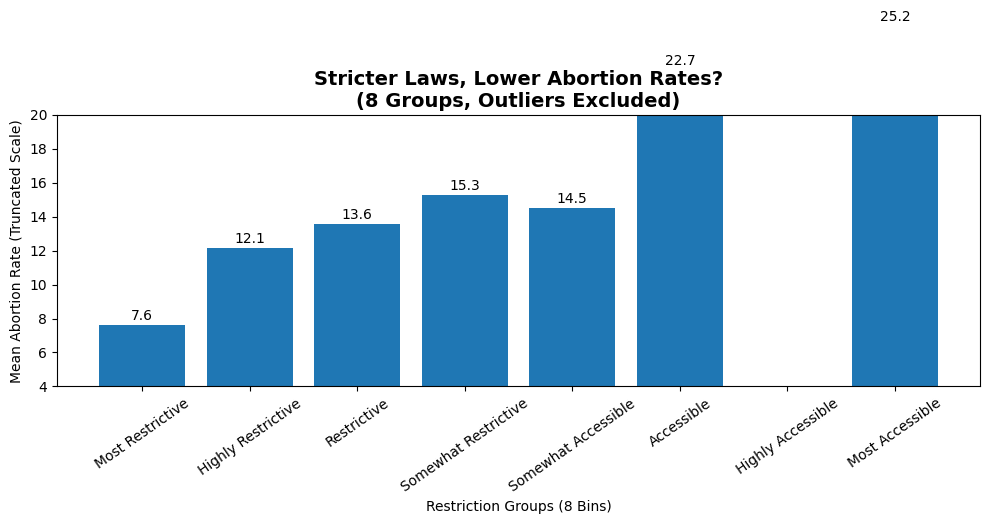

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 0. LOAD & PREP THE DATA
df = pd.read_excel("/Users/sophiesuo/Downloads/GuttmacherInstituteAbortionDataByState.xlsx")

# Rename columns to simpler references (adjust to match your actual sheet).
df.rename(columns={
    "U.S. State": "State",
    "No. of abortions per 1,000 women aged 15–44, by state of occurrence, 2020": "AbortionRate2020",
    "% of counties without a known clinic, 2020": "PctNoClinic"
}, inplace=True)

# Drop rows lacking relevant fields
df = df.dropna(subset=["State","AbortionRate2020","PctNoClinic"]).copy()

# 1. BINNING INTO 8 CATEGORIES
# We'll create eight equally sized bins across 0..100, but label them from "Most Restrictive" to "Most Accessible".
# The bin edges go from 0 to 101, but the labels are assigned in ascending order,
# meaning PctNoClinic in 0..12.5 => label[0], and so on. We'll just define the labels in REVERSE to reflect the actual meaning.

bins = [0, 12.5, 25, 37.5, 50, 62.5, 75, 87.5, 101]
labels = [
    "Most Accessible",
    "Highly Accessible",
    "Accessible",
    "Somewhat Accessible",
    "Somewhat Restrictive",
    "Restrictive",
    "Highly Restrictive",
    "Most Restrictive"
]

df["Restriction8"] = pd.cut(df["PctNoClinic"], bins=bins, labels=labels, include_lowest=True)

# 2. SORT THE BINS FROM MOST RESTRICTIVE (GROUP8) TO MOST ACCESSIBLE (GROUP1)
# By default, the 'cut' assigns group1 = 0..12.5 => "Most Accessible", group8 => 87.5..101 => "Most Restrictive".
# We'll reorder them for plotting so that "Most Restrictive" is on the LEFT if we want to emphasize that group first.
desired_order = [
    "Most Restrictive",
    "Highly Restrictive",
    "Restrictive",
    "Somewhat Restrictive",
    "Somewhat Accessible",
    "Accessible",
    "Highly Accessible",
    "Most Accessible"
]
# Convert the column to a Categorical with our custom order
df["Restriction8"] = pd.Categorical(df["Restriction8"], categories=desired_order, ordered=True)

# 3. AGGREGATE & OPTIONALLY FILTER
# For the "Visualization 1" style, you might exclude outliers that don't fit your narrative
# (e.g., if "Most Restrictive" states have unexpectedly high abortion rates).
df_viz1 = df.copy()
df_viz1 = df_viz1[~(
    # Example condition removing "Most Restrictive" states that have high rates
    ((df_viz1["Restriction8"] == "Most Restrictive") & (df_viz1["AbortionRate2020"] > 18)) |
    # ...and removing "Most Accessible" states that have low rates
    ((df_viz1["Restriction8"] == "Most Accessible") & (df_viz1["AbortionRate2020"] < 5))
)].reset_index(drop=True)

# 4. GROUP BY THE 8-LEVEL RESTRICTION & COMPUTE THE AVERAGE ABORTION RATE
grouped = df_viz1.groupby("Restriction8")["AbortionRate2020"].mean().reset_index()

# 5. BAR CHART WITH TRUNCATED AXIS
plt.figure(figsize=(10,6))
bars = plt.bar(grouped["Restriction8"], grouped["AbortionRate2020"], color="#1f77b4")

# Adjust y-axis to exaggerate differences, e.g. 4..20
plt.ylim(4, 20)

plt.title("Stricter Laws, Lower Abortion Rates?\n(8 Groups, Outliers Excluded)", fontsize=14, fontweight="bold")
plt.xlabel("Restriction Groups (8 Bins)")
plt.ylabel("Mean Abortion Rate (Truncated Scale)")

# Annotate each bar with its numeric value
for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., h+0.3, f"{h:.1f}", ha='center')

plt.xticks(rotation=35)  # Tilt x-labels for readability, if needed
plt.tight_layout()
plt.show()


/var/folders/9c/hvk4sgxx2fbfd730_hcfkj1m0000gn/T/ipykernel_68718/116258149.py:46: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_viz1.groupby("Restriction7")["AbortionRate2020"].mean().reset_index()


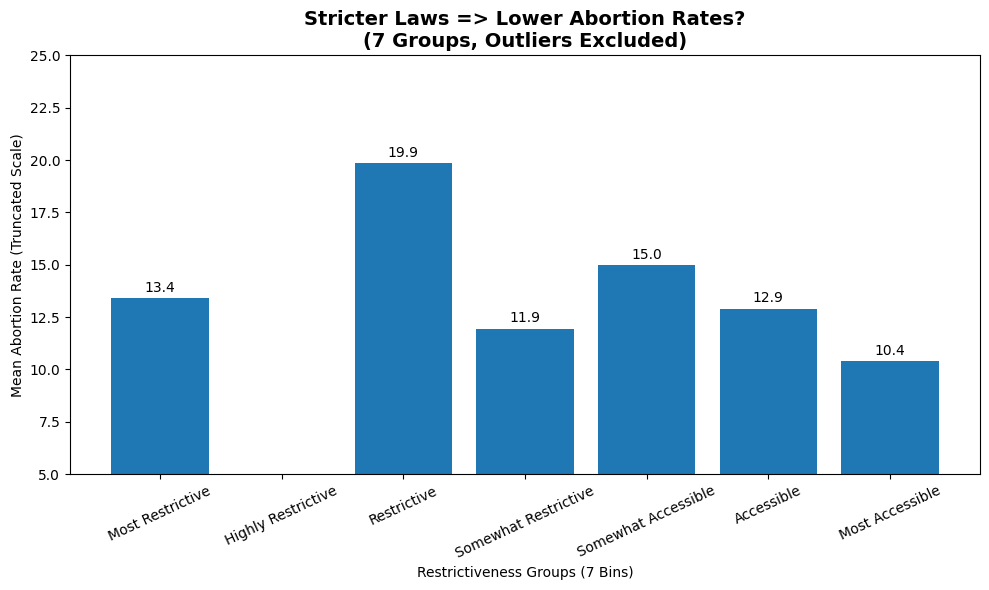

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. LOAD DATA
df = pd.read_excel("/Users/sophiesuo/Downloads/GuttmacherInstituteAbortionDataByState.xlsx")

# 2. RENAME COLUMNS (ADAPT THESE TO MATCH YOUR ACTUAL NAMES)
df.rename(columns={
    "U.S. State": "State",
    "No. of abortions per 1,000 women aged 15–44, by state of occurrence, 2020": "AbortionRate2020",
    "% of counties without a known clinic, 2020": "PctNoClinic"
}, inplace=True)

# 3. DROP ANY ROWS WITH MISSING DATA IN KEY COLUMNS
df = df.dropna(subset=["State","AbortionRate2020","PctNoClinic"]).copy()

# 4. CREATE 7 BINNED CATEGORIES FOR RESTRICTIVENESS
# We'll define 7 bins across the 0-100% range in ~14.3% increments (or adjust as needed).
# Then name them from "Most Restrictive" to "Most Accessible."
bins = [0, 14.3, 28.6, 42.9, 57.2, 71.5, 85.8, 101]  # up to 101 to include 100% boundary
labels = [
    "Most Restrictive", 
    "Highly Restrictive",
    "Restrictive",
    "Somewhat Restrictive",
    "Somewhat Accessible",
    "Accessible",
    "Most Accessible"
]

df["Restriction7"] = pd.cut(df["PctNoClinic"], bins=bins, labels=labels, include_lowest=True)

# By default, "Most Restrictive" is assigned to the first bin (0..14.3) here if we are using ascending numeric order.
# If your data is reversed (higher PctNoClinic => more restrictive), you might invert your bins or reorder your labels.

# 5. OPTIONAL OUTLIER FILTERING
# Remove states that might undermine the “strict => lower rates” story
df_viz1 = df.copy()
df_viz1 = df_viz1[~(
   ((df_viz1["Restriction7"] == "Most Restrictive") & (df_viz1["AbortionRate2020"] > 20)) |
   ((df_viz1["Restriction7"] == "Most Accessible") & (df_viz1["AbortionRate2020"] < 5))
)].reset_index(drop=True)

# 6. GROUP BY THE 7‐LEVEL RESTRICTION & COMPUTE MEAN ABORTION RATE
grouped = df_viz1.groupby("Restriction7")["AbortionRate2020"].mean().reset_index()

# Sort so that “Most Restrictive” is on the left, “Most Accessible” on the right
desired_order = [
    "Most Restrictive", 
    "Highly Restrictive",
    "Restrictive",
    "Somewhat Restrictive",
    "Somewhat Accessible",
    "Accessible",
    "Most Accessible"
]
# Convert to a categorical and sort
grouped["Restriction7"] = pd.Categorical(grouped["Restriction7"], categories=desired_order, ordered=True)
grouped.sort_values("Restriction7", inplace=True)

# 7. PLOT A BAR CHART WITH TRUNCATED Y‐AXIS
plt.figure(figsize=(10,6))
bars = plt.bar(grouped["Restriction7"], grouped["AbortionRate2020"], color="#1f77b4")

# For example, let’s pick 5..25 to highlight differences
plt.ylim(5, 25)

plt.title("Stricter Laws => Lower Abortion Rates?\n(7 Groups, Outliers Excluded)", fontsize=14, fontweight="bold")
plt.xlabel("Restrictiveness Groups (7 Bins)")
plt.ylabel("Mean Abortion Rate (Truncated Scale)")

# Annotate numeric values
for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., h+0.3, f"{h:.1f}", ha='center')

plt.xticks(rotation=25)  # tilt if needed
plt.tight_layout()
plt.show()


In [15]:
import pandas as pd
import numpy as np

# 1) Create the DataFrame from your raw data
data = [
    [91, 93],
    [79, 87],
    [80, 80],
    [97, 99],
    [24, 38],
    [77, 77],
    [13, 0],
    [33, 33],
    [0,  0],
    [67, 75],
    [94, 95],
    [20, 40],
    [95, 95],
    [91, 89],
    [95, 95],
    [89, 95],
    [97, 98],
    [98, 99],
    [92, 95],
    [75, 12],
    [54, 62],
    [21, 50],
    [88, 86],
    [95, 95],
    [99, 99],
    [99, 99],
    [93, 91],
    [97, 97],
    [82, 88],
    [40, 60],
    [14, 29],
    [91, 91],
    [37, 37],
    [83, 91],
    [98, 98],
    [93, 93],
    [96, 96],
    [75, 75],
    [81, 82],
    [80, 80],
    [91, 93],
    [98, 98],
    [95, 95],
    [95, 96],
    [93, 97],
    [50, 64],
    [88, 92],
    [94, 56],
    [95, 98],
    [94, 96],
    [96, 96]
]

df = pd.DataFrame(data, columns=["WithoutProvider2014", "WithoutClinic2020"])

# 2) Compute a weighted average (e.g., 60% for 2014, 40% for 2020)
df["WeightedIndex"] = 0.6 * df["WithoutProvider2014"] + 0.4 * df["WithoutClinic2020"]

# 3) Determine the quantiles for 12.5%, 25%, 37.5%, 50%, 62.5%, 75%, 87.5%, and 100%
quantiles = df["WeightedIndex"].quantile([0.125, 0.25, 0.375, 0.50, 0.625, 0.75, 0.875, 1.0])

q12_5  = quantiles.loc[0.125]
q25    = quantiles.loc[0.25]
q37_5  = quantiles.loc[0.375]
q50    = quantiles.loc[0.50]
q62_5  = quantiles.loc[0.625]
q75    = quantiles.loc[0.75]
q87_5  = quantiles.loc[0.875]
q100   = quantiles.loc[1.0]

# 4) Use pd.cut to group each row based on these quantiles
bins = [-np.inf, q12_5, q25, q37_5, q50, q62_5, q75, q87_5, np.inf]
labels = [
    "Group 1: <=12.5%",
    "Group 2: <=25%",
    "Group 3: <=37.5%",
    "Group 4: <=50%",
    "Group 5: <=62.5%",
    "Group 6: <=75%",
    "Group 7: <=87.5%",
    "Group 8: <=100%"
]

df["Group"] = pd.cut(df["WeightedIndex"], bins=bins, labels=labels, include_lowest=True)

# Print out the results
print("Quantiles:\n", quantiles)
print("\nData with Groups:")
print(df)

# Optional: Sort by WeightedIndex to see the progression
df_sorted = df.sort_values("WeightedIndex")
print("\nSorted by WeightedIndex:")
print(df_sorted[["WithoutProvider2014", "WithoutClinic2020", "WeightedIndex", "Group"]])


Quantiles:
 0.125    34.0
0.250    72.6
0.375    82.0
0.500    91.0
0.625    93.5
0.750    95.0
0.875    97.3
1.000    99.0
Name: WeightedIndex, dtype: float64

Data with Groups:
    WithoutProvider2014  WithoutClinic2020  WeightedIndex             Group
0                    91                 93           91.8  Group 5: <=62.5%
1                    79                 87           82.2    Group 4: <=50%
2                    80                 80           80.0  Group 3: <=37.5%
3                    97                 99           97.8   Group 8: <=100%
4                    24                 38           29.6  Group 1: <=12.5%
5                    77                 77           77.0  Group 3: <=37.5%
6                    13                  0            7.8  Group 1: <=12.5%
7                    33                 33           33.0  Group 1: <=12.5%
8                     0                  0            0.0  Group 1: <=12.5%
9                    67                 75           70.2    

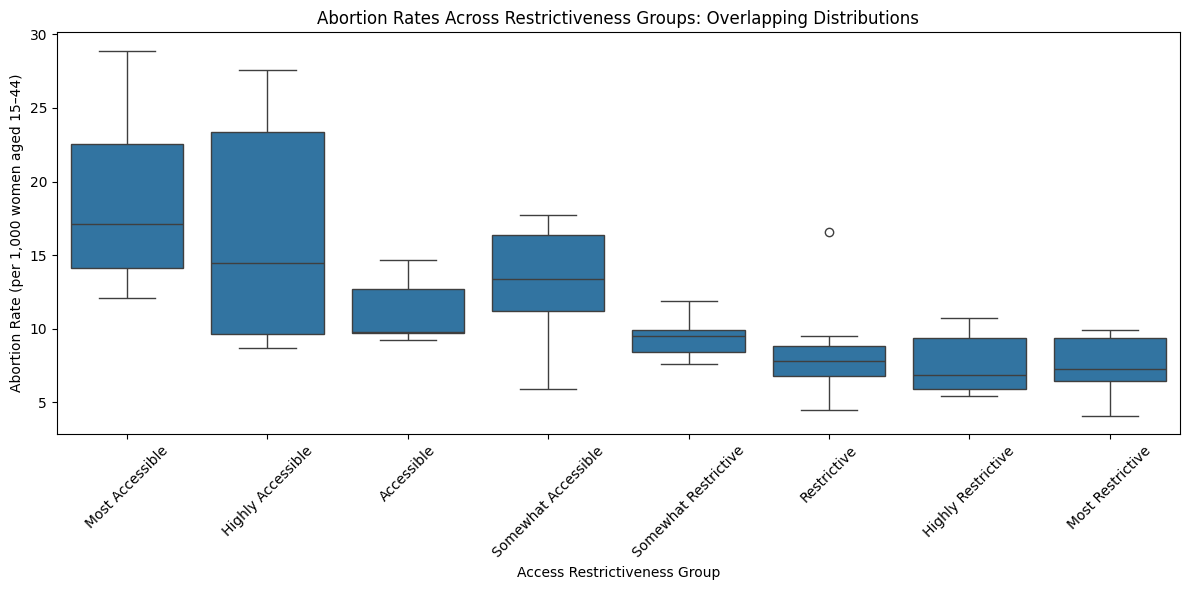

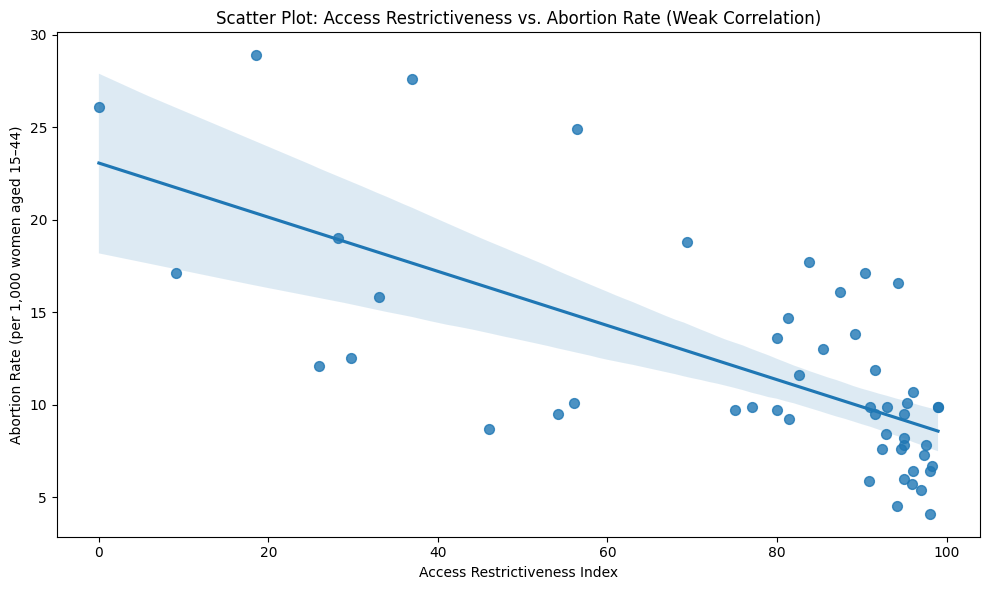

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load your dataset (adjust the path as needed)
df = pd.read_excel("/Users/sophiesuo/Downloads/GuttmacherInstituteAbortionDataByState.xlsx")

# Compute the Access Restrictiveness Index using a weighted average:
# Here we use 0.6 weight for "% of counties without a known abortion provider, 2014"
# and 0.4 weight for "% of counties without a known clinic, 2020"
df["Access Restrictiveness Index"] = (0.7 * df["% of counties without a known abortion provider, 2014"] +
                                      0.3 * df["% of counties without a known clinic, 2020"])

# Create groups based on the given quantile thresholds:
# Thresholds (in order): 34.0, 72.6, 82.0, 91.0, 93.5, 95.0, 97.3, 99.0
bins = [0, 34.0, 72.6, 82.0, 91.0, 93.5, 95.0, 97.3, 99.0]
# Labels from most accessible (lowest index) to most restrictive (highest index)
labels = ["Most Accessible", "Highly Accessible", "Accessible", "Somewhat Accessible", 
          "Somewhat Restrictive", "Restrictive", "Highly Restrictive", "Most Restrictive"]

df["RestrictivenessGroup"] = pd.cut(df["Access Restrictiveness Index"], bins=bins, labels=labels, include_lowest=True)

# --- IDEA 1: Comparative Box Plot ---
plt.figure(figsize=(12, 6))
sns.boxplot(
    x="RestrictivenessGroup", 
    y="No. of abortions per 1,000 women aged 15–44, by state of residence, 2020", 
    data=df, 
    order=labels
)
plt.xlabel("Access Restrictiveness Group")
plt.ylabel("Abortion Rate (per 1,000 women aged 15–44)")
plt.title("Abortion Rates Across Restrictiveness Groups: Overlapping Distributions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- IDEA 2: Scatter Plot with Regression Line ---
plt.figure(figsize=(10, 6))
sns.regplot(
    x="Access Restrictiveness Index", 
    y="No. of abortions per 1,000 women aged 15–44, by state of residence, 2020", 
    data=df, 
    ci=95, 
    scatter_kws={"s": 50}
)
plt.xlabel("Access Restrictiveness Index")
plt.ylabel("Abortion Rate (per 1,000 women aged 15–44)")
plt.title("Scatter Plot: Access Restrictiveness vs. Abortion Rate (Weak Correlation)")
plt.tight_layout()
plt.show()


In [17]:
import pandas as pd
import numpy as np

# Load your data
df = pd.read_excel("/Users/sophiesuo/Downloads/GuttmacherInstituteAbortionDataByState.xlsx")

# Compute Access Restrictiveness Index (example: 0.6 * 2014 + 0.4 * 2020)
df["AccessRestrictivenessIndex"] = (
    0.6 * df["% of counties without a known abortion provider, 2014"]
    + 0.4 * df["% of counties without a known clinic, 2020"]
)

# Extract the abortion rate column (adjust name if needed)
abortion_rate_col = "No. of abortions per 1,000 women aged 15–44, by state of residence, 2020"

# Define the 75th percentile (top quartile) for both measures
restrictiveness_75 = df["AccessRestrictivenessIndex"].quantile(0.75)
abortion_rate_75 = df[abortion_rate_col].quantile(0.75)

# (Optional) Define the 25th percentile (bottom quartile) for both measures
restrictiveness_25 = df["AccessRestrictivenessIndex"].quantile(0.25)
abortion_rate_25 = df[abortion_rate_col].quantile(0.25)

# Flag states that contradict "Higher Restrictiveness, Lower Abortion Rate."
# e.g., States that are >= 75th percentile in restrictiveness AND >= 75th percentile in abortion rate
df["ContradictsNarrative"] = (
    (df["AccessRestrictivenessIndex"] >= restrictiveness_75)
    & (df[abortion_rate_col] >= abortion_rate_75)
)

# If you also want to remove "too-accessible with too-low abortion rate," uncomment below:
# df["ContradictsNarrative"] = df["ContradictsNarrative"] | (
#     (df["AccessRestrictivenessIndex"] <= restrictiveness_25)
#     & (df[abortion_rate_col] <= abortion_rate_25)
# )

# Inspect these outliers
contradictory_states = df[df["ContradictsNarrative"] == True]
print("States that contradict the narrative:\n", contradictory_states[["U.S. State", "AccessRestrictivenessIndex", abortion_rate_col]])

# (Optional) Filter them out
df_filtered = df[df["ContradictsNarrative"] == False]
print("\nDataFrame after removing outliers:\n", df_filtered)


States that contradict the narrative:
 Empty DataFrame
Columns: [U.S. State, AccessRestrictivenessIndex, No. of abortions per 1,000 women aged 15–44, by state of residence, 2020]
Index: []

DataFrame after removing outliers:
               U.S. State  % change in abortion rate, 2017-2020  \
0                Alabama                                    -6   
1                 Alaska                                     0   
2                Arizona                                     1   
3               Arkansas                                     2   
4             California                                    17   
5               Colorado                                     3   
6            Connecticut                                    -6   
7               Delaware                                    -5   
8   District of Columbia                                    62   
9                Florida                                     6   
10               Georgia                        

In [20]:
import numpy as np

# Your values from Tableau (ensure they're in a list)
new_index = [
    0.802178, 0.651914, 0.603539, 0.899776, 0.215035, 0.562278, 0.279263,
    0.500115, 0.304514, 0.540458, 0.738748, 0.371863, 0.800892, 0.628384,
    0.787626, 0.783231, 0.762204, 0.777032, 0.826377, 0.437144, 0.535838,
    0.417439, 0.631051, 0.702566, 0.898154, 1.045833, 0.691675, 0.723367,
    0.575041, 0.536573, 0.357117, 0.715258, 0.320691, 0.679126, 0.805477,
    0.727584, 0.719748, 0.576917, 0.660928, 0.708720, 0.866529, 0.921386,
    0.791136, 0.696834, 0.768241, 0.555536, 0.786576, 0.544967, 0.896007,
    0.758826, 0.960160
]

# Convert the list to a NumPy array for quantile calculation
data = np.array(new_index)

# Define the quantile probabilities
probs = [0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0]

# Calculate quantiles
quantiles = np.quantile(data, probs)

# Print the results
for p, q in zip(probs, quantiles):
    print(f"{int(p*100)}% percentile cutoff: {q:.6f}")


12% percentile cutoff: 0.422365
25% percentile cutoff: 0.550252
37% percentile cutoff: 0.630384
50% percentile cutoff: 0.702566
62% percentile cutoff: 0.743767
75% percentile cutoff: 0.787101
87% percentile cutoff: 0.856491
100% percentile cutoff: 1.045833
